In [1]:
import numpy as np
print("numpy version: {}".format(np.__version__))
import pandas as pd 
print("pandas version: {}".format(pd.__version__))
import seaborn as sns
print("seaborn version: {}".format(sns.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import sklearn as sl
print("scikit-learn: {}".format(sl.__version__))
import warnings
warnings.filterwarnings('ignore')
import pickle

numpy version: 1.17.4
pandas version: 0.25.3
seaborn version: 0.9.0
matplotlib version: 3.1.2
scikit-learn: 0.21.3


In [2]:
from sklearn.model_selection import train_test_split

### import data

In [3]:
!ls

ds_internship_task  internship_task.ipynb  README.md  xgb_grid.pickle


In [4]:
!ls ds_internship_task/

insurance.csv  readme.txt


In [5]:
!cat ds_internship_task/readme.txt

Health Insurance Dataset

Task:
- Build a model that predicts "charges" for a given person based on their features.
- Evaluate the quality of your model.
- Identify the factors with the highest impact.

Expected result - link to a GitHub repo with:
- Code for the solution (any programming language, Python or R preferred).
- Brief summary of the solution*: what did you do, which steps did you make, how to interpret the results.

* Both code and solution can be a single report file, e.g. .ipynb or .rmd


In [6]:
data = pd.read_csv('ds_internship_task/insurance.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

There are 4 quantitive variables and 3 categorical variables.

quantitive - age, bmi, children, charges. 

charges - target variable

categorical - sex, smoker, region

In [10]:
target = 'charges'

In [11]:
data[target].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

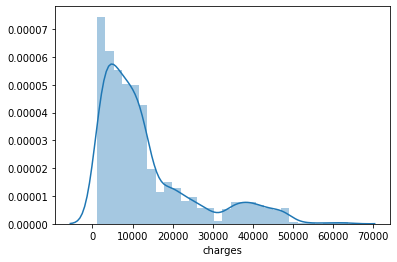

In [12]:
sns.distplot(data[target])

In [13]:
print(f"skewness: {data[target].skew()}")
print(f"kurtosis: {data[target].kurt()}")

skewness: 1.5158796580240388
kurtosis: 1.6062986532967907


In [14]:
print(f"skewness: {np.log(data[target]).skew()}")
print(f"kurtosis: {np.log(data[target]).kurt()}")

skewness: -0.09009752473024583
kurtosis: -0.6366666331104724


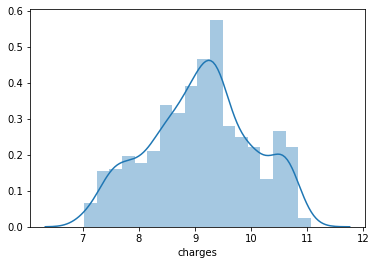

In [15]:
sns.distplot(np.log(data[target]))

In [16]:
def scatter_plot(var, target=target):
    d = pd.concat([data[target], data[var]], axis=1)
    d.plot.scatter(x=var, y=target)

In [17]:
def box_plot(var, target=target):
    d = pd.concat([data[target], data[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y=target, data=d)

In [18]:
def descriptive_stats(var, target=target):
    d = pd.DataFrame(index=data.describe().index, columns=np.unique(data[var]))
    for x in np.unique(data[var]):
        d[x] = data[target][data[var] == x].describe()
    return d

In [19]:
def corrmat_plot(n, target=target):
    corrmat = data.corr()
    cols = corrmat.nlargest(n, target)[target].index
    hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, 
                     fmt='.2f', annot_kws={'size': 10}, 
                     yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

In [20]:
def count_outliers(var, target=target):
    res = {}
    for x in np.unique(data[var]):
        df = data[target][data[var] == x]
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        res[x] = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return res

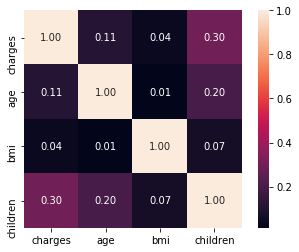

In [21]:
corrmat_plot(len(data))

As we can see data have weak linear relationship.
Children have the biggest impact on changes, then age, then bmi.

quantitive -> quantitive


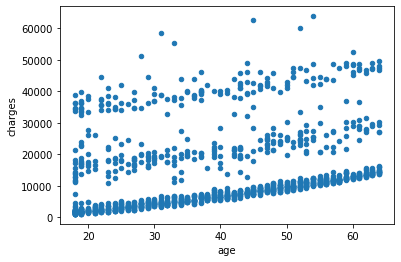

In [22]:
scatter_plot('age')

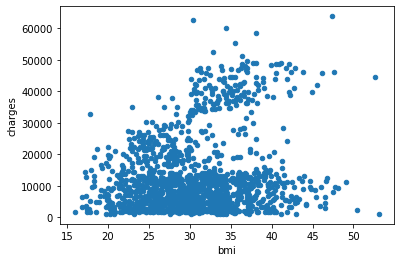

In [23]:
scatter_plot('bmi')

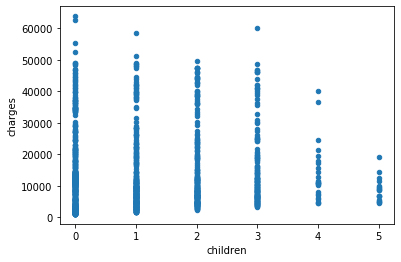

In [24]:
scatter_plot('children')

In [25]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


categorical -> quantitive

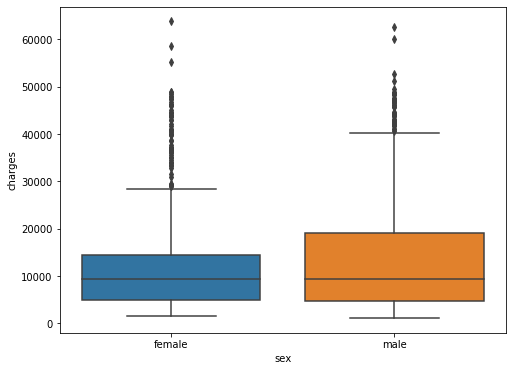

In [26]:
box_plot('sex')

In [27]:
descriptive_stats('sex')

,female,male
count,662.000000,676.000000
mean,12569.578844,13956.751178
std,11128.703801,12971.025915
min,1607.510100,1121.873900
25%,4885.158700,4619.134000
50%,9412.962500,9369.615750
75%,14454.691825,18989.590250
max,63770.428010,62592.873090


In [28]:
count_outliers('sex')

{'female': 65, 'male': 44}

median's are close to each other. 

min, max, Q1, range are close

male Q3 is larger than female Q3

the largest observation that are not classified as outlier in male's are higher then in female's. 

female's have more outliers

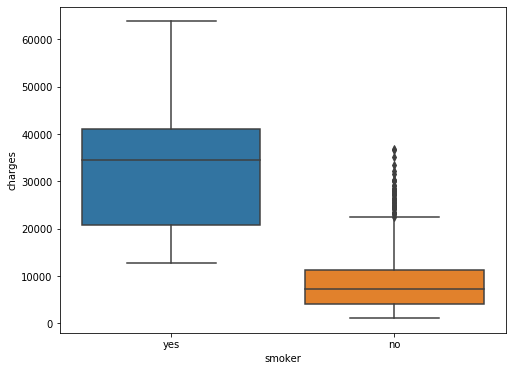

In [29]:
box_plot('smoker')

In [30]:
descriptive_stats('smoker')

,no,yes
count,1064.000000,274.000000
mean,8434.268298,32050.231832
std,5993.781819,11541.547176
min,1121.873900,12829.455100
25%,3986.438700,20826.244213
50%,7345.405300,34456.348450
75%,11362.887050,41019.207275
max,36910.608030,63770.428010


there is huge difference between smokers and non-smokers

every statistic of smokers is higher than non-smokers

there are many outliers in non-smokers

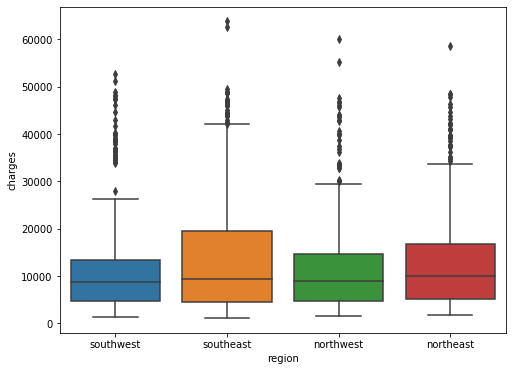

In [31]:
box_plot('region')

In [32]:
descriptive_stats('region')

,northeast,northwest,southeast,southwest
count,324.000000,325.000000,364.000000,325.000000
mean,13406.384516,12417.575374,14735.411438,12346.937377
std,11255.803066,11072.276928,13971.098589,11557.179101
min,1694.796400,1621.340200,1121.873900,1241.565000
25%,5194.322288,4719.736550,4440.886200,4751.070000
50%,10057.652025,8965.795750,9294.131950,8798.593000
75%,16687.364100,14711.743800,19526.286900,13462.520000
max,58571.074480,60021.398970,63770.428010,52590.829390


In [33]:
count_outliers('region')

{'northeast': 29, 'northwest': 29, 'southeast': 26, 'southwest': 38}

median of regions are close to each other

range of southeast are the highest

southwest have more outliers

As a result we can conclude that smokers have the biggest impact on the target variable

region and sex - not.

categorical variables to numerical

In [34]:
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)

Data engineering

In [35]:
data['has_no_child'] = 1
data['has_no_child'].loc[data['children'] > 0] = 0

In [36]:
data['bmi/age'] = data['bmi'] / data['age']

In [37]:
data['children/age'] = data['children'] / data['age']

In [38]:
data.head()

,age,sex,bmi,children,smoker,region,charges,has_no_child,bmi/age,children/age
0,19,0,27.900,0,1,southwest,16884.92400,1,1.468421,0.000000
1,18,1,33.770,1,0,southeast,1725.55230,0,1.876111,0.055556
2,28,1,33.000,3,0,southeast,4449.46200,0,1.178571,0.107143
3,33,1,22.705,0,0,northwest,21984.47061,1,0.688030,0.000000
4,32,1,28.880,0,0,northwest,3866.85520,1,0.902500,0.000000


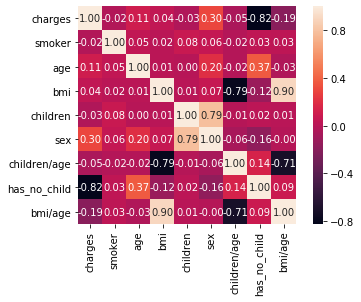

In [39]:
corrmat_plot(len(data))

In [40]:
data['region'] = data['region'].astype('category')
data['region_cat'] = data['region'].cat.codes
data.drop(['region'], inplace=True, axis=1)

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [42]:
y = data[target]
X = data.drop([target], axis=1)

In [43]:
X.shape, y.shape

((1338, 9), (1338,))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.33)

### normalize the data

In [45]:
scaler = MinMaxScaler().fit(X_train)

In [46]:
X_train_scaled = scaler.transform(X_train)

use the same scaler to the test set to 

In [47]:
X_test_scaled = scaler.transform(X_test)

In [48]:
eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]

## Training

Our data is not linear, that why we should use something else than linear models.

In [49]:
from sklearn import linear_model
from sklearn import ensemble
import xgboost
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [90]:
class XGBoostHelper:
    def __init__(self, xgboost_params):
        self.xgboost_params = xgboost_params
        self.model = None
        self.results_ = {}
    
    def train(self, eval_set):
        self.model = xgboost.XGBRegressor(**self.xgboost_params).fit(X_train_scaled, y_train,
                                                                     eval_metric=["rmse"], eval_set=eval_set)
        self.results_ = self.model.evals_result()

    def results(self, X_train, y_train, X_test, y_test):    
        print("with params:")
        [print(f"{x:<25} - {xgboost_params[x]}") for x in xgboost_params]
        print(f"xgboost train set score {self.model.score(X_train, y_train)}")
        print(f"xgboost test set score {self.model.score(X_test, y_test)}")

In [91]:
xgboost_params = {'gamma':0,                 
                 'learning_rate':0.03,
                 'max_depth':10,
                 'min_child_weight':1,
                 'n_estimators':1000,                                                                    
                 'reg_alpha':2,
                 'reg_lambda':1,
                 'subsample':0.7,
                 'objective':'reg:squarederror'}

In [92]:
xgboost_helper = XGBoostHelper(xgboost_params)
xgboost_helper.train(eval_set)
xgboost_helper.results(X_train_scaled, y_train, X_test_scaled, y_test)

[0]	validation_0-rmse:17187.9	validation_1-rmse:18023.7
[1]	validation_0-rmse:16715	validation_1-rmse:17535.4
[2]	validation_0-rmse:16257.8	validation_1-rmse:17064.2
[3]	validation_0-rmse:15821.6	validation_1-rmse:16618.9
[4]	validation_0-rmse:15390.5	validation_1-rmse:16178.5
[5]	validation_0-rmse:14972.1	validation_1-rmse:15749.4
[6]	validation_0-rmse:14566.3	validation_1-rmse:15334.2
[7]	validation_0-rmse:14174.4	validation_1-rmse:14939.2
[8]	validation_0-rmse:13787.5	validation_1-rmse:14551
[9]	validation_0-rmse:13422.5	validation_1-rmse:14177.6
[10]	validation_0-rmse:13064	validation_1-rmse:13817.6
[11]	validation_0-rmse:12715.6	validation_1-rmse:13465.6
[12]	validation_0-rmse:12379	validation_1-rmse:13128
[13]	validation_0-rmse:12052	validation_1-rmse:12804
[14]	validation_0-rmse:11740.5	validation_1-rmse:12495.1
[15]	validation_0-rmse:11434.9	validation_1-rmse:12196.3
[16]	validation_0-rmse:11142.3	validation_1-rmse:11909
[17]	validation_0-rmse:10856.5	validation_1-rmse:11631.8


[145]	validation_0-rmse:1371.64	validation_1-rmse:5097.4
[146]	validation_0-rmse:1358.88	validation_1-rmse:5095.42
[147]	validation_0-rmse:1346.23	validation_1-rmse:5096.78
[148]	validation_0-rmse:1335.64	validation_1-rmse:5097.79
[149]	validation_0-rmse:1324.53	validation_1-rmse:5098.12
[150]	validation_0-rmse:1314.12	validation_1-rmse:5098.44
[151]	validation_0-rmse:1300.22	validation_1-rmse:5099.25
[152]	validation_0-rmse:1288.45	validation_1-rmse:5101
[153]	validation_0-rmse:1277.04	validation_1-rmse:5101.34
[154]	validation_0-rmse:1268.6	validation_1-rmse:5101.69
[155]	validation_0-rmse:1258.36	validation_1-rmse:5103.39
[156]	validation_0-rmse:1248.28	validation_1-rmse:5103.39
[157]	validation_0-rmse:1235.67	validation_1-rmse:5105.22
[158]	validation_0-rmse:1228.1	validation_1-rmse:5106.48
[159]	validation_0-rmse:1216.03	validation_1-rmse:5107.82
[160]	validation_0-rmse:1205.3	validation_1-rmse:5108.35
[161]	validation_0-rmse:1198.5	validation_1-rmse:5107.48
[162]	validation_0-rms

[287]	validation_0-rmse:590.072	validation_1-rmse:5182.67
[288]	validation_0-rmse:588.444	validation_1-rmse:5183.34
[289]	validation_0-rmse:586.313	validation_1-rmse:5183.97
[290]	validation_0-rmse:584.873	validation_1-rmse:5185.08
[291]	validation_0-rmse:582.495	validation_1-rmse:5185.75
[292]	validation_0-rmse:580.768	validation_1-rmse:5185.26
[293]	validation_0-rmse:577.884	validation_1-rmse:5185.13
[294]	validation_0-rmse:574.825	validation_1-rmse:5185.36
[295]	validation_0-rmse:573.366	validation_1-rmse:5185.91
[296]	validation_0-rmse:570.939	validation_1-rmse:5187.39
[297]	validation_0-rmse:567.448	validation_1-rmse:5187.84
[298]	validation_0-rmse:564.128	validation_1-rmse:5187.71
[299]	validation_0-rmse:560.963	validation_1-rmse:5188.54
[300]	validation_0-rmse:559.188	validation_1-rmse:5189.03
[301]	validation_0-rmse:556.467	validation_1-rmse:5188.94
[302]	validation_0-rmse:554.366	validation_1-rmse:5189.65
[303]	validation_0-rmse:552.453	validation_1-rmse:5190.2
[304]	validatio

[429]	validation_0-rmse:386.727	validation_1-rmse:5212.14
[430]	validation_0-rmse:386.114	validation_1-rmse:5212.79
[431]	validation_0-rmse:385.26	validation_1-rmse:5212.92
[432]	validation_0-rmse:384.33	validation_1-rmse:5213
[433]	validation_0-rmse:383.845	validation_1-rmse:5213.28
[434]	validation_0-rmse:382.791	validation_1-rmse:5213.16
[435]	validation_0-rmse:382.068	validation_1-rmse:5213.53
[436]	validation_0-rmse:380.66	validation_1-rmse:5213.5
[437]	validation_0-rmse:379.864	validation_1-rmse:5213.89
[438]	validation_0-rmse:379.445	validation_1-rmse:5214.31
[439]	validation_0-rmse:378.679	validation_1-rmse:5214.37
[440]	validation_0-rmse:377.131	validation_1-rmse:5214.17
[441]	validation_0-rmse:376.564	validation_1-rmse:5214.54
[442]	validation_0-rmse:375.547	validation_1-rmse:5214.39
[443]	validation_0-rmse:374.953	validation_1-rmse:5214.1
[444]	validation_0-rmse:373.958	validation_1-rmse:5213.91
[445]	validation_0-rmse:373.09	validation_1-rmse:5213.94
[446]	validation_0-rmse

[571]	validation_0-rmse:319.57	validation_1-rmse:5220.61
[572]	validation_0-rmse:319.354	validation_1-rmse:5220.6
[573]	validation_0-rmse:319.282	validation_1-rmse:5220.28
[574]	validation_0-rmse:318.995	validation_1-rmse:5220.35
[575]	validation_0-rmse:318.841	validation_1-rmse:5220.33
[576]	validation_0-rmse:318.509	validation_1-rmse:5220.22
[577]	validation_0-rmse:318.255	validation_1-rmse:5220.59
[578]	validation_0-rmse:318.074	validation_1-rmse:5220.4
[579]	validation_0-rmse:317.928	validation_1-rmse:5219.93
[580]	validation_0-rmse:317.635	validation_1-rmse:5220.13
[581]	validation_0-rmse:317.401	validation_1-rmse:5220.04
[582]	validation_0-rmse:317.145	validation_1-rmse:5220.44
[583]	validation_0-rmse:316.921	validation_1-rmse:5220.45
[584]	validation_0-rmse:316.658	validation_1-rmse:5220.58
[585]	validation_0-rmse:316.415	validation_1-rmse:5220.68
[586]	validation_0-rmse:316.418	validation_1-rmse:5220.95
[587]	validation_0-rmse:316.14	validation_1-rmse:5220.89
[588]	validation_0

[714]	validation_0-rmse:302.455	validation_1-rmse:5222.53
[715]	validation_0-rmse:302.719	validation_1-rmse:5222.25
[716]	validation_0-rmse:302.606	validation_1-rmse:5222.27
[717]	validation_0-rmse:302.527	validation_1-rmse:5222.3
[718]	validation_0-rmse:302.442	validation_1-rmse:5222.36
[719]	validation_0-rmse:302.044	validation_1-rmse:5222.75
[720]	validation_0-rmse:302.276	validation_1-rmse:5222.45
[721]	validation_0-rmse:302.18	validation_1-rmse:5222.47
[722]	validation_0-rmse:302.07	validation_1-rmse:5222.5
[723]	validation_0-rmse:301.975	validation_1-rmse:5222.5
[724]	validation_0-rmse:301.882	validation_1-rmse:5222.57
[725]	validation_0-rmse:301.809	validation_1-rmse:5222.6
[726]	validation_0-rmse:301.44	validation_1-rmse:5222.99
[727]	validation_0-rmse:301.357	validation_1-rmse:5223.04
[728]	validation_0-rmse:301.302	validation_1-rmse:5223.05
[729]	validation_0-rmse:301.23	validation_1-rmse:5223.06
[730]	validation_0-rmse:301.437	validation_1-rmse:5222.82
[731]	validation_0-rms

[857]	validation_0-rmse:297.336	validation_1-rmse:5224.86
[858]	validation_0-rmse:297.388	validation_1-rmse:5225.26
[859]	validation_0-rmse:297.36	validation_1-rmse:5225.25
[860]	validation_0-rmse:297.347	validation_1-rmse:5225.23
[861]	validation_0-rmse:297.335	validation_1-rmse:5225.22
[862]	validation_0-rmse:297.25	validation_1-rmse:5224.92
[863]	validation_0-rmse:297.238	validation_1-rmse:5224.91
[864]	validation_0-rmse:297.224	validation_1-rmse:5224.57
[865]	validation_0-rmse:297.204	validation_1-rmse:5224.58
[866]	validation_0-rmse:297.194	validation_1-rmse:5224.61
[867]	validation_0-rmse:297.18	validation_1-rmse:5224.62
[868]	validation_0-rmse:297.168	validation_1-rmse:5224.99
[869]	validation_0-rmse:297.149	validation_1-rmse:5224.95
[870]	validation_0-rmse:297.127	validation_1-rmse:5224.97
[871]	validation_0-rmse:297.114	validation_1-rmse:5224.65
[872]	validation_0-rmse:297.102	validation_1-rmse:5224.66
[873]	validation_0-rmse:297.085	validation_1-rmse:5224.69
[874]	validation_

[999]	validation_0-rmse:296.27	validation_1-rmse:5223.96
with params:
gamma                     - 0
learning_rate             - 0.03
max_depth                 - 10
min_child_weight          - 1
n_estimators              - 1000
reg_alpha                 - 2
reg_lambda                - 1
subsample                 - 0.7
objective                 - reg:squarederror
xgboost train set score 0.99940323124988
xgboost test set score 0.8110266537145915


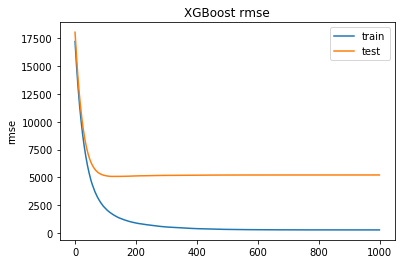

In [60]:
results = xgboost_helper.results_
fig, ax = plt.subplots()
ax.plot(results['validation_0']['rmse'], label='train')
ax.plot(results['validation_1']['rmse'], label='test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost rmse')
plt.show()

Now our model is overfitting. So we need to generalize model.

We can 
 - decrease 
     * learning_rate
     * max_depth
 - increase 
     * reg_alpha
     * reg_lambda

In [93]:
xgboost_params = {'gamma':0,                 
                 'learning_rate':0.01,
                 'max_depth':6,
                 'min_child_weight':1,
                 'n_estimators':1000,                                                                    
                 'reg_alpha':5,
                 'reg_lambda':10,
                 'subsample':0.7,
                 'objective':'reg:squarederror'}
xgboost_helper = XGBoostHelper(xgboost_params)
xgboost_helper.train(eval_set)
xgboost_helper.results(X_train_scaled, y_train, X_test_scaled, y_test)

[0]	validation_0-rmse:17532.7	validation_1-rmse:18378.4
[1]	validation_0-rmse:17388.6	validation_1-rmse:18228.8
[2]	validation_0-rmse:17248.1	validation_1-rmse:18083
[3]	validation_0-rmse:17111	validation_1-rmse:17940.6
[4]	validation_0-rmse:16972.7	validation_1-rmse:17796.7
[5]	validation_0-rmse:16835	validation_1-rmse:17653.1
[6]	validation_0-rmse:16696.5	validation_1-rmse:17509.3
[7]	validation_0-rmse:16559.2	validation_1-rmse:17366.9
[8]	validation_0-rmse:16425.3	validation_1-rmse:17227.7
[9]	validation_0-rmse:16294.2	validation_1-rmse:17091.2
[10]	validation_0-rmse:16163.2	validation_1-rmse:16955.2
[11]	validation_0-rmse:16032.5	validation_1-rmse:16818.8
[12]	validation_0-rmse:15902.6	validation_1-rmse:16684.1
[13]	validation_0-rmse:15775.3	validation_1-rmse:16551.3
[14]	validation_0-rmse:15649.8	validation_1-rmse:16421.1
[15]	validation_0-rmse:15523.3	validation_1-rmse:16289.7
[16]	validation_0-rmse:15398.4	validation_1-rmse:16160.4
[17]	validation_0-rmse:15277.5	validation_1-rms

[144]	validation_0-rmse:6557.3	validation_1-rmse:7205.94
[145]	validation_0-rmse:6527.26	validation_1-rmse:7176.42
[146]	validation_0-rmse:6495.25	validation_1-rmse:7148.64
[147]	validation_0-rmse:6463.33	validation_1-rmse:7120.05
[148]	validation_0-rmse:6432.31	validation_1-rmse:7092.58
[149]	validation_0-rmse:6400.92	validation_1-rmse:7065.99
[150]	validation_0-rmse:6369.76	validation_1-rmse:7038.21
[151]	validation_0-rmse:6337.57	validation_1-rmse:7007.84
[152]	validation_0-rmse:6308.54	validation_1-rmse:6983.25
[153]	validation_0-rmse:6279.11	validation_1-rmse:6956
[154]	validation_0-rmse:6249.86	validation_1-rmse:6928.53
[155]	validation_0-rmse:6221.09	validation_1-rmse:6900.74
[156]	validation_0-rmse:6192.22	validation_1-rmse:6876.16
[157]	validation_0-rmse:6162.95	validation_1-rmse:6851.27
[158]	validation_0-rmse:6136.78	validation_1-rmse:6829.46
[159]	validation_0-rmse:6108.31	validation_1-rmse:6803.76
[160]	validation_0-rmse:6080.76	validation_1-rmse:6777.81
[161]	validation_0

[286]	validation_0-rmse:4210.41	validation_1-rmse:5270.41
[287]	validation_0-rmse:4202.49	validation_1-rmse:5265.33
[288]	validation_0-rmse:4194.79	validation_1-rmse:5259.93
[289]	validation_0-rmse:4187.6	validation_1-rmse:5255.42
[290]	validation_0-rmse:4179.82	validation_1-rmse:5250.95
[291]	validation_0-rmse:4173.05	validation_1-rmse:5246.52
[292]	validation_0-rmse:4165.8	validation_1-rmse:5240.53
[293]	validation_0-rmse:4158.04	validation_1-rmse:5237.11
[294]	validation_0-rmse:4152.04	validation_1-rmse:5233.84
[295]	validation_0-rmse:4144.69	validation_1-rmse:5230.04
[296]	validation_0-rmse:4138.29	validation_1-rmse:5225.86
[297]	validation_0-rmse:4131.54	validation_1-rmse:5221.7
[298]	validation_0-rmse:4124.94	validation_1-rmse:5217.54
[299]	validation_0-rmse:4118.29	validation_1-rmse:5213.88
[300]	validation_0-rmse:4111.83	validation_1-rmse:5210.25
[301]	validation_0-rmse:4105.35	validation_1-rmse:5206.22
[302]	validation_0-rmse:4098.79	validation_1-rmse:5203.05
[303]	validation_

[428]	validation_0-rmse:3576.32	validation_1-rmse:4986.94
[429]	validation_0-rmse:3573.39	validation_1-rmse:4986.18
[430]	validation_0-rmse:3570.97	validation_1-rmse:4985.15
[431]	validation_0-rmse:3568.98	validation_1-rmse:4985.1
[432]	validation_0-rmse:3566.11	validation_1-rmse:4984.3
[433]	validation_0-rmse:3563.82	validation_1-rmse:4983.58
[434]	validation_0-rmse:3561.42	validation_1-rmse:4982.75
[435]	validation_0-rmse:3557.82	validation_1-rmse:4982.64
[436]	validation_0-rmse:3554.94	validation_1-rmse:4981.7
[437]	validation_0-rmse:3552.49	validation_1-rmse:4981.71
[438]	validation_0-rmse:3549.38	validation_1-rmse:4981.5
[439]	validation_0-rmse:3546.1	validation_1-rmse:4980.55
[440]	validation_0-rmse:3543.32	validation_1-rmse:4979.86
[441]	validation_0-rmse:3540.11	validation_1-rmse:4979.47
[442]	validation_0-rmse:3536.89	validation_1-rmse:4979.2
[443]	validation_0-rmse:3533.93	validation_1-rmse:4977.69
[444]	validation_0-rmse:3530.82	validation_1-rmse:4977.51
[445]	validation_0-r

[570]	validation_0-rmse:3235.29	validation_1-rmse:4960.83
[571]	validation_0-rmse:3233.24	validation_1-rmse:4961.39
[572]	validation_0-rmse:3231.8	validation_1-rmse:4960.93
[573]	validation_0-rmse:3228.75	validation_1-rmse:4961.05
[574]	validation_0-rmse:3226.33	validation_1-rmse:4961.5
[575]	validation_0-rmse:3224.08	validation_1-rmse:4961.49
[576]	validation_0-rmse:3221.77	validation_1-rmse:4961.46
[577]	validation_0-rmse:3219.89	validation_1-rmse:4960.9
[578]	validation_0-rmse:3218.61	validation_1-rmse:4960.35
[579]	validation_0-rmse:3216.72	validation_1-rmse:4960.37
[580]	validation_0-rmse:3214.93	validation_1-rmse:4960.42
[581]	validation_0-rmse:3212.89	validation_1-rmse:4960.55
[582]	validation_0-rmse:3211.54	validation_1-rmse:4960.49
[583]	validation_0-rmse:3209.67	validation_1-rmse:4960.57
[584]	validation_0-rmse:3208.35	validation_1-rmse:4960.43
[585]	validation_0-rmse:3206.3	validation_1-rmse:4960.19
[586]	validation_0-rmse:3204.61	validation_1-rmse:4960.14
[587]	validation_0

[712]	validation_0-rmse:2982.08	validation_1-rmse:4968.65
[713]	validation_0-rmse:2981.35	validation_1-rmse:4968.94
[714]	validation_0-rmse:2980.44	validation_1-rmse:4968.77
[715]	validation_0-rmse:2979.26	validation_1-rmse:4968.92
[716]	validation_0-rmse:2976.94	validation_1-rmse:4968.34
[717]	validation_0-rmse:2975.87	validation_1-rmse:4968.12
[718]	validation_0-rmse:2974.94	validation_1-rmse:4968.28
[719]	validation_0-rmse:2972.84	validation_1-rmse:4967.75
[720]	validation_0-rmse:2970.89	validation_1-rmse:4967.89
[721]	validation_0-rmse:2969.42	validation_1-rmse:4968.08
[722]	validation_0-rmse:2967.62	validation_1-rmse:4967.74
[723]	validation_0-rmse:2966.28	validation_1-rmse:4967.7
[724]	validation_0-rmse:2964.53	validation_1-rmse:4967.64
[725]	validation_0-rmse:2963.44	validation_1-rmse:4967.23
[726]	validation_0-rmse:2961.99	validation_1-rmse:4967.71
[727]	validation_0-rmse:2960.24	validation_1-rmse:4968
[728]	validation_0-rmse:2958.12	validation_1-rmse:4968.01
[729]	validation_0

[854]	validation_0-rmse:2778.97	validation_1-rmse:4987.63
[855]	validation_0-rmse:2777.99	validation_1-rmse:4987.9
[856]	validation_0-rmse:2776.45	validation_1-rmse:4988.14
[857]	validation_0-rmse:2775.03	validation_1-rmse:4987.86
[858]	validation_0-rmse:2773.68	validation_1-rmse:4987.89
[859]	validation_0-rmse:2772.11	validation_1-rmse:4987.58
[860]	validation_0-rmse:2770.07	validation_1-rmse:4988.29
[861]	validation_0-rmse:2768.38	validation_1-rmse:4988.83
[862]	validation_0-rmse:2767.28	validation_1-rmse:4988.75
[863]	validation_0-rmse:2766.71	validation_1-rmse:4988.67
[864]	validation_0-rmse:2765.63	validation_1-rmse:4988.96
[865]	validation_0-rmse:2764.47	validation_1-rmse:4989.17
[866]	validation_0-rmse:2762.92	validation_1-rmse:4989.35
[867]	validation_0-rmse:2761.44	validation_1-rmse:4989.59
[868]	validation_0-rmse:2760.37	validation_1-rmse:4989.64
[869]	validation_0-rmse:2759.2	validation_1-rmse:4989.54
[870]	validation_0-rmse:2757.27	validation_1-rmse:4990.28
[871]	validation

[996]	validation_0-rmse:2598.41	validation_1-rmse:5009.3
[997]	validation_0-rmse:2597.17	validation_1-rmse:5009.4
[998]	validation_0-rmse:2595.96	validation_1-rmse:5009.04
[999]	validation_0-rmse:2594.57	validation_1-rmse:5009.27
with params:
gamma                     - 0
learning_rate             - 0.01
max_depth                 - 6
min_child_weight          - 1
n_estimators              - 1000
reg_alpha                 - 5
reg_lambda                - 10
subsample                 - 0.7
objective                 - reg:squarederror
xgboost train set score 0.954232087555154
xgboost test set score 0.8262402913964202


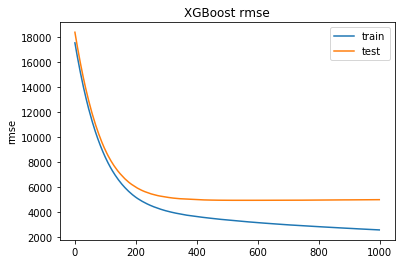

In [94]:
results = xgboost_helper.results_
fig, ax = plt.subplots()
ax.plot(results['validation_0']['rmse'], label='train')
ax.plot(results['validation_1']['rmse'], label='test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost rmse')
plt.show()

Instead of trying to choose right hyperparams manually we can automate this process

In [64]:
xgboost_params = {'gamma': [0.1, 0.3, 1],                 
                 'learning_rate': [0.001, 0.03, 0.1],
                 'max_depth': [2, 4],
                 'min_child_weight':[3],
                 'n_estimators':[1000],                                                                    
                 'reg_alpha': list(range(1, 10, 2)),
                 'reg_lambda': list(range(1, 10, 2)),
                 'silent': [1],
                 'subsample': [0.6, 0.8],
                 'objective':['reg:squarederror']}

In [66]:
xgb_grid = GridSearchCV(xgboost.XGBRegressor(), 
                    param_grid = xgboost_params, 
                    scoring = 'r2', 
                    n_jobs = -1, 
                    cv = 5,
                    verbose=True)

xgb_grid.fit(X_train_scaled, y_train)
print(f"best_params: {xgb_grid.best_params_}\nbest_score: {xgb_grid.best_score_}")

pickle.dump(xgb_grid.best_estimator_, open("xgb_grid.pickle", "wb"))

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 20.0min finished


best_params: {'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'reg_alpha': 7, 'reg_lambda': 7, 'silent': 1, 'subsample': 0.6}
best_score: 0.8667320632125807


In [67]:
best_model = xgb_grid.best_estimator_

In [68]:
print(f"train R2 is {best_model.score(X_train_scaled, y_train)}\nRMSE is {mean_squared_error(y_train, best_model.predict(X_train_scaled))}")
print(f"test  R2 is {best_model.score(X_test_scaled, y_test)}\nRMSE is {mean_squared_error(y_test, best_model.predict(X_test_scaled))}")

train R2 is 0.9139294304755359
RMSE is 12659690.630475242
test  R2 is 0.8280289505514542
RMSE is 24834457.78124551


As we can see with grid search we evaluate our model on 0.002, but it takes 16 min. 

This approach is time consuming but we can get better results.

To compare we will try linear regrassion, ridge and lasso models.

In [69]:
lr = linear_model.LinearRegression().fit(X_train_scaled, y_train)

In [70]:
lr_test_score = lr.score(X_test_scaled, y_test)

In [72]:
print(f"lr train R2 is {lr.score(X_train_scaled, y_train)}\nRMSE is {mean_squared_error(y_train, lr.predict(X_train_scaled))}")
print(f"lr test set score {lr_test_score}\nRMSE is {mean_squared_error(y_test, lr.predict(X_test_scaled))}")

lr train R2 is 0.7619139078836461
RMSE is 35018895.381599225
lr test set score 0.7271650060028311
RMSE is 39400289.53359604


In [73]:
print(f"lr.coef_:{lr.coef_}")
print(f"lr.intercept_:{lr.intercept_}")

lr.coef_:[14030.8940646   -542.17694309 10149.8608597   3366.01599274
 23904.04146278   128.09030179  4292.03495365   163.99361078
 -1200.26236408]
lr.intercept_:-2927.081772153504


In [74]:
alphas = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
best_ridge_model = None
best_ridge_score = 0
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha).fit(X_train_scaled, y_train)
    pred_ridge = ridge.predict(X_test_scaled)
    
    score = ridge.score(X_test_scaled, y_test)
    if score > best_ridge_score:
        best_ridge_score = score
        best_ridge_model = ridge
    print(f'alpha={alpha}\nR^2 train is: {ridge.score(X_train_scaled, y_train)}\nRMSE train is {mean_squared_error(y_train, ridge.predict(X_train_scaled))}\nR^2 test is: {score}\nRMSE test is {mean_squared_error(y_test, ridge.predict(X_test_scaled))}')
    print('-' * 30)
print(f'best_alpha is {best_ridge_model.alpha}, best_test_score is {best_ridge_score}, RMSE best test is {mean_squared_error(y_test, best_ridge_model.predict(X_test_scaled))}')

alpha=0.0001
R^2 train is: 0.7619139078815315
RMSE train is 35018895.38191025
R^2 test is: 0.7271649211131967
RMSE test is 39400301.79256664
------------------------------
alpha=0.0003
R^2 train is: 0.7619139078646178
RMSE train is 35018895.384398
R^2 test is: 0.7271647513626109
RMSE test is 39400326.30636574
------------------------------
alpha=0.001
R^2 train is: 0.7619139076723351
RMSE train is 35018895.4126799
R^2 test is: 0.7271641575365746
RMSE test is 39400412.06119294
------------------------------
alpha=0.003
R^2 train is: 0.7619139059847672
RMSE train is 35018895.660895854
R^2 test is: 0.7271624634670734
RMSE test is 39400656.702937245
------------------------------
alpha=0.01
R^2 train is: 0.7619138868975681
RMSE train is 35018898.46833672
R^2 test is: 0.7271565641328613
RMSE test is 39401508.62985691
------------------------------
alpha=0.03
R^2 train is: 0.7619137218309759
RMSE train is 35018922.747158185
R^2 test is: 0.7271399614996947
RMSE test is 39403906.2275558
------

In [75]:
best_lasso_model = None
best_lasso_score = 0
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    pred_lasso = lasso.predict(X_test_scaled)
    tmp_mean = mean_squared_error(y_test, pred_ridge)
    score = lasso.score(X_test_scaled, y_test)
    if score > best_lasso_score:
        best_lasso_score = score
        best_lasso_model = lasso
    print(f'alpha={alpha}\nR^2 train is: {lasso.score(X_train_scaled, y_train)}\nRMSE train is {mean_squared_error(y_train, lasso.predict(X_train_scaled))}\nR^2 test is: {score}\nRMSE test is {mean_squared_error(y_test, lasso.predict(X_test_scaled))}')
    print('-' * 30)
print(f'best_alpha is {best_lasso_model.alpha}, best_test_score is {best_lasso_score}, RMSE best test is {mean_squared_error(y_test, best_lasso_model.predict(X_test_scaled))}')

alpha=0.0001
R^2 train is: 0.7619139078835977
RMSE train is 35018895.38160634
R^2 test is: 0.7271649852237763
RMSE test is 39400292.53431367
------------------------------
alpha=0.0003
R^2 train is: 0.7619139078832102
RMSE train is 35018895.38166333
R^2 test is: 0.7271649436245813
RMSE test is 39400298.54168207
------------------------------
alpha=0.001
R^2 train is: 0.76191390787881
RMSE train is 35018895.38231053
R^2 test is: 0.7271647983188352
RMSE test is 39400319.525385045
------------------------------
alpha=0.003
R^2 train is: 0.7619139078400925
RMSE train is 35018895.3880053
R^2 test is: 0.7271643825124288
RMSE test is 39400379.57227477
------------------------------
alpha=0.01
R^2 train is: 0.7619139073994003
RMSE train is 35018895.45282452
R^2 test is: 0.7271629259438503
RMSE test is 39400589.916347116
------------------------------
alpha=0.03
R^2 train is: 0.7619139035308871
RMSE train is 35018896.02182483
R^2 test is: 0.7271587693249203
RMSE test is 39401190.176551744
-----

both regularization models show the best performance with low alpha 

as you might expect linear models performed worse than xgboost

In [76]:
best_scores = {"no_reg": lr_test_score, "ridge": best_ridge_score, "lasso": best_lasso_score,}

In [77]:
max(best_scores)

'ridge'

In [78]:
for x in best_scores:
    print(best_scores[x])

0.7271650060028311
0.7271649211131967
0.7271649852237763


In [79]:
max(*best_lasso_model.coef_, *best_ridge_model.coef_, *lr.coef_)

23904.04146278308

In [80]:
min(*best_lasso_model.coef_, *best_ridge_model.coef_, *lr.coef_)

-1200.2623640755521

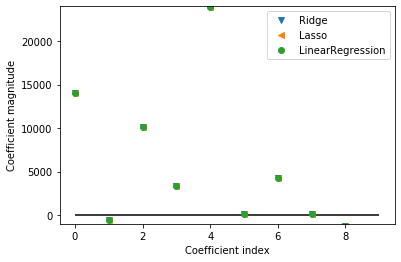

In [81]:
plt.plot(best_ridge_model.coef_, 'v', label="Ridge")
plt.plot(best_lasso_model.coef_, '<', label="Lasso")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(best_ridge_model.coef_))
plt.ylim(-1000, 24000)
plt.legend()
plt.show()

Here all parameters are the same because of low regularization parameter on lasso and ridge.